# Small molecules as drugs

In this notebook we use ChEMBL data and some coding to find all small molecules that are in phase 4 (FDA approved drugs).  
Inspired by a [post](http://pipeline.corante.com/archives/2014/08/25/small_molecules_really_really_small.php) by Derek Lowe
#### Skip to [results](#results)

In [1]:
import pandas as pd # Import pandas
import rdkit.Chem as Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration

##### Load the drug data downloaded from [ChEMBL](https://www.ebi.ac.uk/chembl/drugstore)

In [2]:
dataframe = pd.read_csv('chembl_drugs.txt', delimiter='\t')

In [3]:
dataframe.columns

Index([u'PARENT_MOLREGNO', u'CHEMBL_ID', u'SYNONYMS', u'DEVELOPMENT_PHASE', u'RESEARCH_CODES', u'APPLICANTS', u'USAN_STEM', u'USAN_STEM_DEFINITION', u'USAN_STEM_SUBSTEM', u'USAN_YEAR', u'FIRST_APPROVAL', u'ATC_CODE', u'ATC_CODE_DESCRIPTION', u'INDICATION_CLASS', u'DRUG_TYPE', u'RULE_OF_FIVE', u'FIRST_IN_CLASS', u'CHIRALITY', u'PRODRUG', u'ORAL', u'PARENTERAL', u'TOPICAL', u'BLACK_BOX', u'AVAILABILITY_TYPE', u'CANONICAL_SMILES'], dtype='object')

Quick look

In [4]:
dataframe[['DEVELOPMENT_PHASE', 'USAN_STEM', 'USAN_STEM_DEFINITION', 'USAN_STEM_SUBSTEM', 'INDICATION_CLASS', 'DRUG_TYPE']].head()

,DEVELOPMENT_PHASE,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,INDICATION_CLASS,DRUG_TYPE
0,NaN,-orex,anorexiants,-orex,Anorexic,Synthetic Small Molecule
1,NaN,-mulin,"antibacterials, pleuromulin derivatives",-mulin,Antibacterial (veterinary),Synthetic Small Molecule
2,NaN,NaN,NaN,NaN,Antineoplastic,Synthetic Small Molecule
3,NaN,-fylline,theophylline derivatives,-fylline,NaN,Natural Product-derived
4,4,NaN,NaN,NaN,NaN,Natural Product-derived


Some cleaning

In [5]:
dataframe = dataframe[dataframe['CANONICAL_SMILES'] != ""] # remove lines without SMILES
dataframe = dataframe[dataframe['CANONICAL_SMILES'].notnull()] # remove lines without SMILES
dataframe['CANONICAL_SMILES'] = dataframe['CANONICAL_SMILES'].astype(str) # change type of SMILES column

Add RDKit molecule objects to data frame

In [6]:
PandasTools.AddMoleculeColumnToFrame(dataframe, smilesCol='CANONICAL_SMILES')

In [7]:
dataframe = dataframe[dataframe['ROMol'].notnull()] # Remove mols not recognized by RDKit

Calculate MW and keep only compounds with MW <= 180

In [8]:
from rdkit.Chem import Descriptors
dataframe['mw'] = dataframe['ROMol'].map(Descriptors.MolWt)

In [9]:
small = dataframe[dataframe['mw'] <= 180 ]

Some name parsing

In [10]:
def getname(x):
    return x.split(';')[0].split(' (')[0]

In [11]:
small['NAME'] = small['SYNONYMS'].map(getname)

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Tag the ones that have carbon atom (assumed organic)

In [12]:
def hasorgC(x):
    patt = Chem.MolFromSmarts('[#6]')
    mol = Chem.MolFromSmiles(x)
    return mol.HasSubstructMatch(patt)

In [13]:
small['organic'] = small['CANONICAL_SMILES'].map(hasorgC)

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Keep only the ones that are in phase 4

In [14]:
smallPhase4 = small[small['DEVELOPMENT_PHASE'] == 4]

#Results

All small drugs in any phase, phase 4 small drugs, phase 4 small organic drugs

In [15]:
len(small), len(smallPhase4), len((smallPhase4[smallPhase4['organic'] == True]))

(605, 175, 138)

## Structures of phase 4 small organic drugs

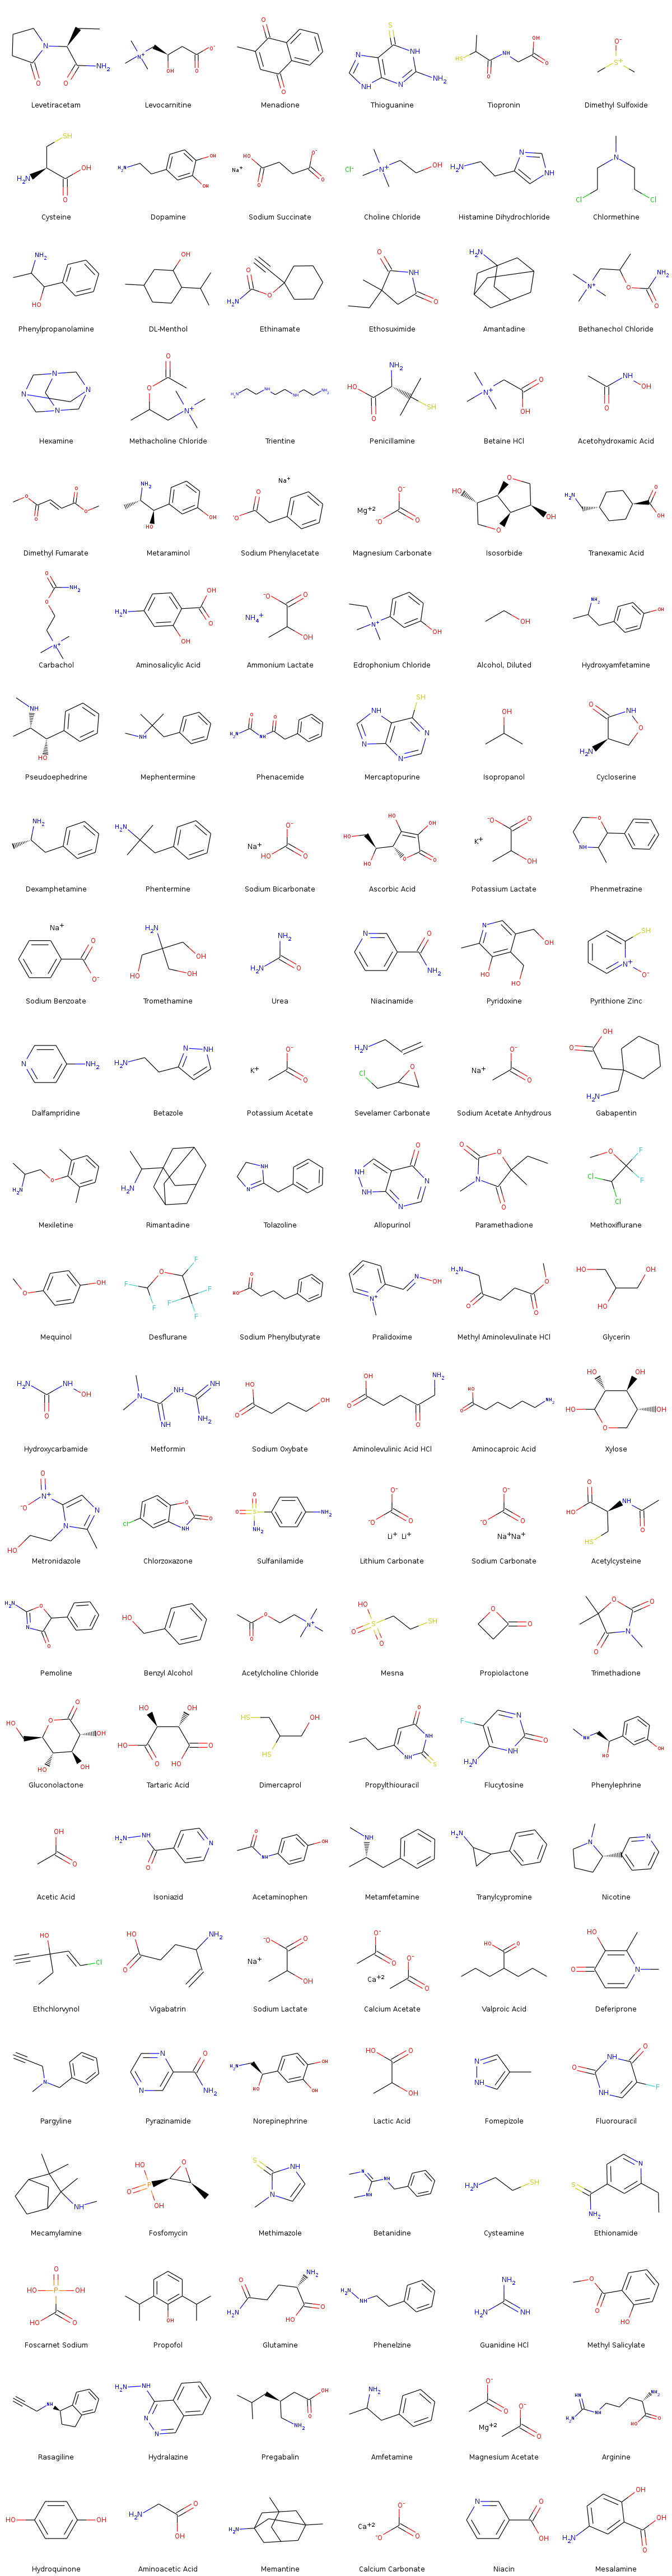

In [16]:
PandasTools.FrameToGridImage(smallPhase4[smallPhase4['organic'] == True], legendsCol='NAME', molsPerRow=6)

#### List all phase 4 small organic drugs

In [17]:
", ".join(sorted(list(smallPhase4[smallPhase4['organic'] == True]['NAME'])))

'Acetaminophen, Acetic Acid, Acetohydroxamic Acid, Acetylcholine Chloride, Acetylcysteine, Alcohol, Diluted, Allopurinol, Amantadine, Amfetamine, Aminoacetic Acid, Aminocaproic Acid, Aminolevulinic Acid HCl, Aminosalicylic Acid, Ammonium Lactate, Arginine, Ascorbic Acid, Benzyl Alcohol, Betaine HCl, Betanidine, Betazole, Bethanechol Chloride, Calcium Acetate, Calcium Carbonate, Carbachol, Chlormethine, Chlorzoxazone, Choline Chloride, Cycloserine, Cysteamine, Cysteine, DL-Menthol, Dalfampridine, Deferiprone, Desflurane, Dexamphetamine, Dimercaprol, Dimethyl Fumarate, Dimethyl Sulfoxide, Dopamine, Edrophonium Chloride, Ethchlorvynol, Ethinamate, Ethionamide, Ethosuximide, Flucytosine, Fluorouracil, Fomepizole, Foscarnet Sodium, Fosfomycin, Gabapentin, Gluconolactone, Glutamine, Glycerin, Guanidine HCl, Hexamine, Histamine Dihydrochloride, Hydralazine, Hydroquinone, Hydroxyamfetamine, Hydroxycarbamide, Isoniazid, Isopropanol, Isosorbide, Lactic Acid, Levetiracetam, Levocarnitine, Lithium


Copyright (C) 2014 by Samo Turk

This work is licensed under the Attribution 4.0 International (CC BY 4.0). To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA.
